In [1]:
from array import array
import math
import numpy as np

In [2]:
fs = 0.2
phis = 0.0
N = 200
tseries = 50.0

In [3]:
tau = tseries/N
t = array('d')
y = array('d')
f = array('d')
ytReal = array('d')
ytImag = array('d')
power = array('d')

In [4]:
for i in range(N):
    t.append(i*tau)
    y.append(0.8*math.sin(2.0*math.pi*t[i]*fs))
    #y.append(0.8*math.sin(2.0*math.pi*t[i]*fs) + 0.5*math.sin(2.0*math.pi*t[i]*2*fs) + 0.33*math.sin(2.0*math.pi*t[i]*3*fs)+ phis)
    f.append(i/(N*tau))

In [5]:
twopiN=-2.0*math.pi/N
for k in range(N):
    ytReal.append(0.0)
    ytImag.append(0.0)
    for j in range(N):
        ytReal[k] = ytReal[k] + y[j]*math.cos(twopiN*j*k)
        ytImag[k] = ytImag[k] + y[j]*math.sin(twopiN*j*k)   
    power.append(ytReal[k]**2+ytImag[k]**2)

In [6]:
integral = 0.0
for k in range(N):
    integral = integral + power[k]/(N**2)
print("Average Power = %.2f Watts." % integral)

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/tau)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

Average Power = 0.50 Watts.
Nyquist frequency = 2.00 Hz.


Welcome to JupyROOT 6.18/00


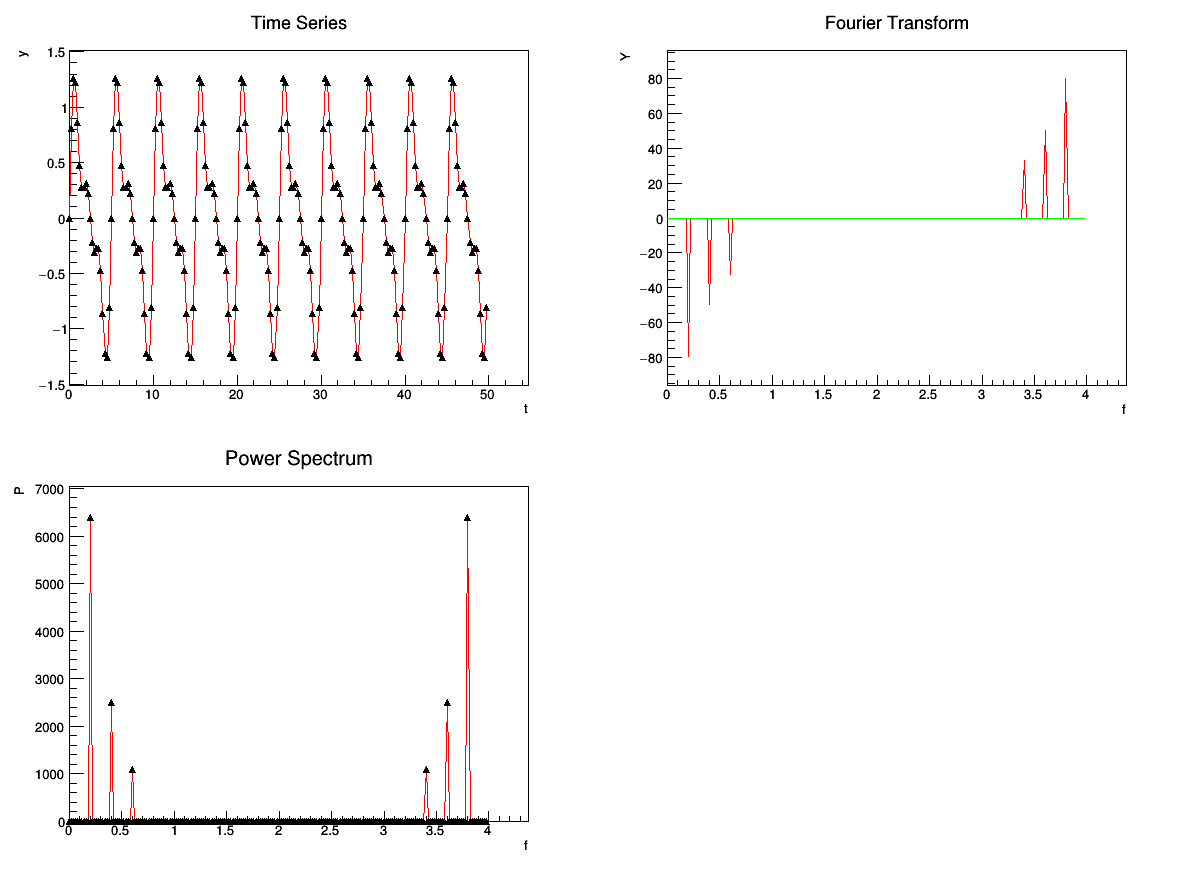

In [7]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle

gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 1200, 900 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,2)

c1.cd(1)
gr = TGraph(N,t,y)
gr.SetMarkerStyle(22)
gr.SetLineColor(2)
gr.SetTitle("Time Series")
gr.GetXaxis().SetTitle("t")
gr.GetYaxis().SetTitle("y")
gr.Draw("APL")

c1.cd(2)
grr = TGraph(N,f,ytReal)
gri = TGraph(N,f,ytImag)
gri.SetMarkerStyle(22)
grr.SetMarkerStyle(23)
gri.SetLineColor(2)
grr.SetLineColor(3)
gri.SetTitle("Fourier Transform")
gri.GetXaxis().SetTitle("f")
gri.GetYaxis().SetTitle("Y")
gri.Draw("AL")
grr.Draw("L")

c1.cd(3)
grp = TGraph(N,f,power)
grp.SetMarkerStyle(22)
grp.SetLineColor(2)
grp.SetTitle("Power Spectrum")
grp.GetXaxis().SetTitle("f")
grp.GetYaxis().SetTitle("P")
grp.Draw("APL")

c1.Draw()